In [64]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a small dataset
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
Y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# Define a simple three layer perceptron, 2 nodes for input layer, 4 nodes for hidden layer, 1 node for output layer
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.fc1 = nn.Linear(2, 4, bias=False)
        self.fc2 = nn.Linear(4, 1, bias=False)

    def forward(self, x):
        x1 = torch.sigmoid(self.fc1(x))
        x2 = torch.sigmoid(self.fc2(x1))
        return x1,x2

# Instantiate the model
model = XORModel()

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

#Store
rayleigh_quotients_fc1 = [[] for _ in range(4)]
rayleigh_quotients_fc2 = []
losses = []



# Train the model
for epoch in range(10000):
    model.train()
    optimizer.zero_grad()
    x1, outputs = model(X)
    loss = criterion(outputs, Y)
    loss.backward()
    optimizer.step()


    if epoch % 500 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")
        
        # Compute Rayleigh quotient for each layer
        with torch.no_grad():
            XXT = torch.mm(X.T, X)  # Compute X.T * X once for all nodes

            for i in range(model.fc1.out_features):  # For each node in fc1
                w = model.fc1.weight[i, :].unsqueeze(1)  # Weight vector of node i
                numerator = torch.mm(torch.mm(w.T, XXT), w)
                denominator = torch.mm(w.T, w)
                rq = (numerator / denominator).item()
                print(f"Node {i + 1} in fc1, Rayleigh Quotient: {rq}")
                print(f"weights: {w.T}")
                rayleigh_quotients_fc1[i].append(rq)

            # For fc2 (only one node)
            x1T_x1 = torch.mm(x1.T, x1)  # Compute x1.T * x1
            w = model.fc2.weight.squeeze().unsqueeze(1)
            numerator = torch.mm(torch.mm(w.T, x1T_x1), w)
            denominator = torch.mm(w.T, w)
            rq = (numerator / denominator).item()
            print(f"Rayleigh Quotient for fc2: {rq}")
            print(f"weights: {w.T}")
            print('\n\n')
            rayleigh_quotients_fc2.append(rq)

        losses.append(loss.detach().numpy())

# Evaluate the model
with torch.no_grad():
    first_layer, predicted = model(X)
    predicted = torch.round(predicted)
    print("Predicted:", predicted)




Epoch 1, Loss: 0.6974676251411438
Node 1 in fc1, Rayleigh Quotient: 2.869835376739502
weights: tensor([[-0.2619, -0.4497]], requires_grad=True)
Node 2 in fc1, Rayleigh Quotient: 1.4988176822662354
weights: tensor([[ 0.1172, -0.4363]], requires_grad=True)
Node 3 in fc1, Rayleigh Quotient: 1.498266339302063
weights: tensor([[ 0.1142, -0.4244]], requires_grad=True)
Node 4 in fc1, Rayleigh Quotient: 1.034850835800171
weights: tensor([[ 0.5110, -0.3909]], requires_grad=True)
Rayleigh Quotient for fc2: 0.36004260182380676
weights: tensor([[ 0.2106,  0.4656, -0.0734, -0.2046]], requires_grad=True)



Epoch 501, Loss: 0.12284509092569351
Node 1 in fc1, Rayleigh Quotient: 2.998049259185791
weights: tensor([[4.2912, 4.0312]], requires_grad=True)
Node 2 in fc1, Rayleigh Quotient: 1.188244104385376
weights: tensor([[ 3.1668, -6.1795]], requires_grad=True)
Node 3 in fc1, Rayleigh Quotient: 2.9999849796295166
weights: tensor([[-4.5640, -4.5892]], requires_grad=True)
Node 4 in fc1, Rayleigh Quotient:

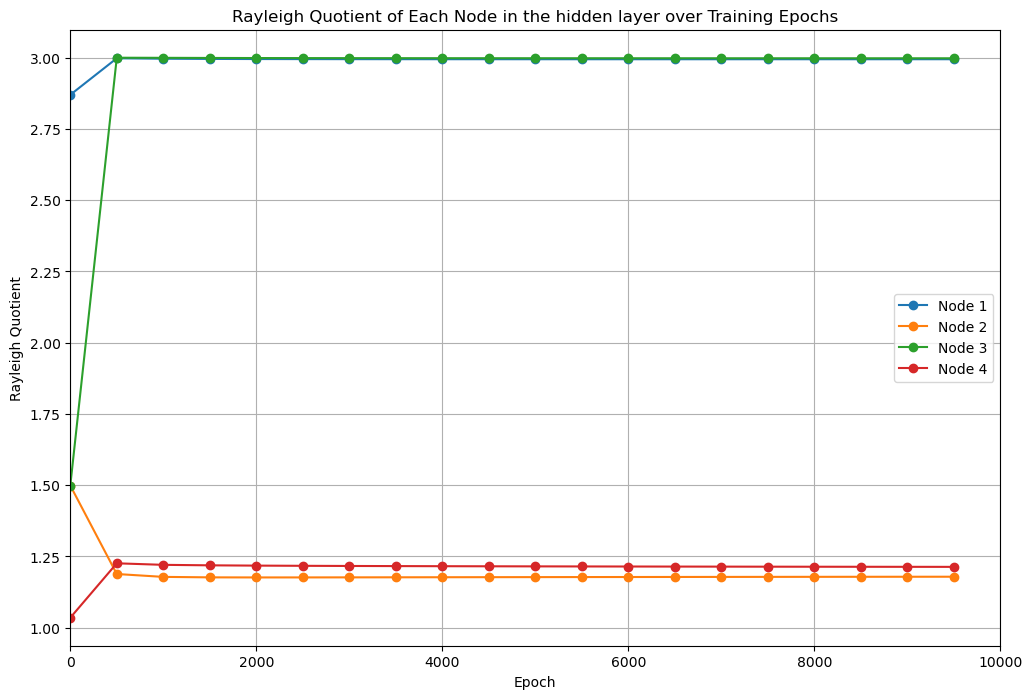

In [78]:
import matplotlib.pyplot as plt
3
# Assuming rayleigh_quotients_fc1 is already filled with Rayleigh quotients at every 500 epochs
# Let's plot them

epochs = list(range(0, 10000, 500))  # Since you're recording every 500 epochs up to 10000

plt.figure(figsize=(12, 8))
for i in range(len(rayleigh_quotients_fc1)):
    plt.plot(epochs, rayleigh_quotients_fc1[i], marker='o', linestyle='-', label=f'Node {i + 1}')

plt.title('Rayleigh Quotient of Each Node in the hidden layer over Training Epochs')
plt.xlabel('Epoch')
plt.xlim(0,10000)
plt.ylabel('Rayleigh Quotient')
plt.legend()
plt.grid(True)
plt.show()


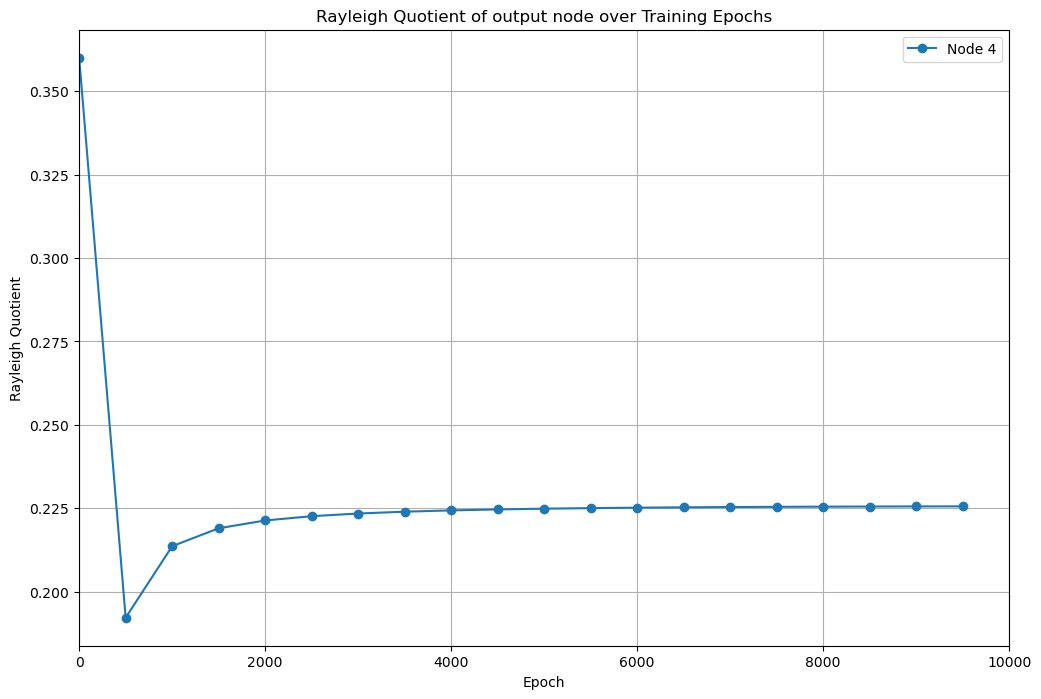

In [79]:
import matplotlib.pyplot as plt

# Assuming rayleigh_quotients_fc1 is already filled with Rayleigh quotients at every 500 epochs
# Let's plot them

epochs = list(range(0, 10000, 500))  # Since you're recording every 500 epochs up to 10000

plt.figure(figsize=(12, 8))
plt.plot(epochs, rayleigh_quotients_fc2, marker='o', linestyle='-', label=f'Node {i + 1}')

plt.title('Rayleigh Quotient of output node over Training Epochs')
plt.xlabel('Epoch')
plt.xlim(0,10000)
plt.ylabel('Rayleigh Quotient')
plt.legend()
plt.grid(True)
plt.show()

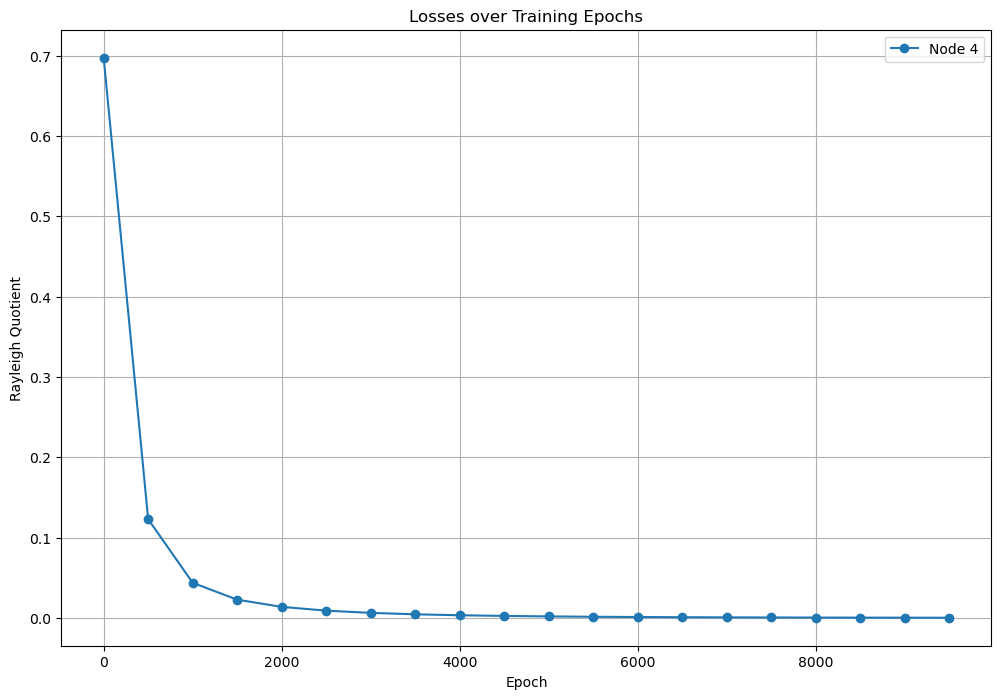

In [80]:
import matplotlib.pyplot as plt


epochs = list(range(0, 10000, 500))  # Since you're recording every 500 epochs up to 10000

plt.figure(figsize=(12, 8))
plt.plot(epochs, losses, marker='o', linestyle='-', label=f'Node {i + 1}')

plt.title('Losses over Training Epochs')
plt.xlabel('Epoch')
plt.ylabel('Rayleigh Quotient')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
losses

[array(0.6974676, dtype=float32),
 array(0.12284509, dtype=float32),
 array(0.04368497, dtype=float32),
 array(0.02265617, dtype=float32),
 array(0.01369413, dtype=float32),
 array(0.0089924, dtype=float32),
 array(0.00621367, dtype=float32),
 array(0.00444069, dtype=float32),
 array(0.00324852, dtype=float32),
 array(0.00241636, dtype=float32),
 array(0.00181938, dtype=float32),
 array(0.00138237, dtype=float32),
 array(0.00105743, dtype=float32),
 array(0.00081306, dtype=float32),
 array(0.00062759, dtype=float32),
 array(0.0004859, dtype=float32),
 array(0.00037705, dtype=float32),
 array(0.00029311, dtype=float32),
 array(0.00022816, dtype=float32),
 array(0.0001778, dtype=float32)]

In [69]:
x = torch.tensor([[0,0],
     [0,1],
     [1,0],
     [1,1]])
x_transpose = x.T

In [70]:
torch.mm(x_transpose, x) / (x.shape[0] - 1)

tensor([[0.6667, 0.3333],
        [0.3333, 0.6667]])

In [71]:
torch.cov(x_transpose)

tensor([[0.3333, 0.0000],
        [0.0000, 0.3333]])

In [72]:
# Transpose the data to have variables in columns
x_transpose = x.T

# Calculate the covariance matrix using torch.cov()
cov_matrix_from_cov = torch.cov(x_transpose)

# Calculate the covariance matrix using torch.mm() and scale
scaled_cov_matrix = torch.mm(x_transpose, x) / (x.shape[0] - 1)

In [73]:
cov_matrix_from_cov

tensor([[0.3333, 0.0000],
        [0.0000, 0.3333]])

In [74]:
scaled_cov_matrix

tensor([[0.6667, 0.3333],
        [0.3333, 0.6667]])